# Deliverable 3
Gain some insight on the “real diamond dataset.csv” by applying unique value count, frequency count, scatterplot, histogram and correlation.

Members: 
1. John Kenneth S. Camarador
2. Israel Ephraim V. Esteban
3. Russel John S. Evangelista
4. Lee Rasheed M. Rebodos

# Reading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('real diamond dataset.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
x,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
y,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9
z,53940.0,NaN,NaN,NaN,3.539635,0.703869,0.0,2.91,3.53,4.04,31.8


In [5]:
df['price'] = df['price'].astype('float64')
cat_feat = df.select_dtypes('object')
num_feat = df.select_dtypes('float64')
num_feat.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75


In [6]:
cat_feat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


# Unique Value Counts

In [7]:
for cols in cat_feat.columns:
    print(cat_feat[cols].value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


In [8]:
for cols in num_feat.columns:
    print(num_feat[cols].value_counts())

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: carat, Length: 273, dtype: int64
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: depth, Length: 184, dtype: int64
56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
51.6       1
63.5       1
43.0       1
62.4       1
61.6       1
Name: table, Length: 127, dtype: int64
605.0      132
802.0      127
625.0      126
828.0      125
776.0      124
          ... 
8816.0       1
14704.0      1
14699.0      1
14698.0      1
9793.0       1
Name: price, Length: 11602, dtype: int64
4.37     448
4.34     437
4.33     429
4.38     428
4.32     425
        ... 
10.74      1
9.36       1
8.89       1
10.23      1
10.00      1
Name: x, Length: 554, dtype: int64
4.34     437
4.37     435
4.35     425
4.33     421
4.32     414
     

# Frequency Counts

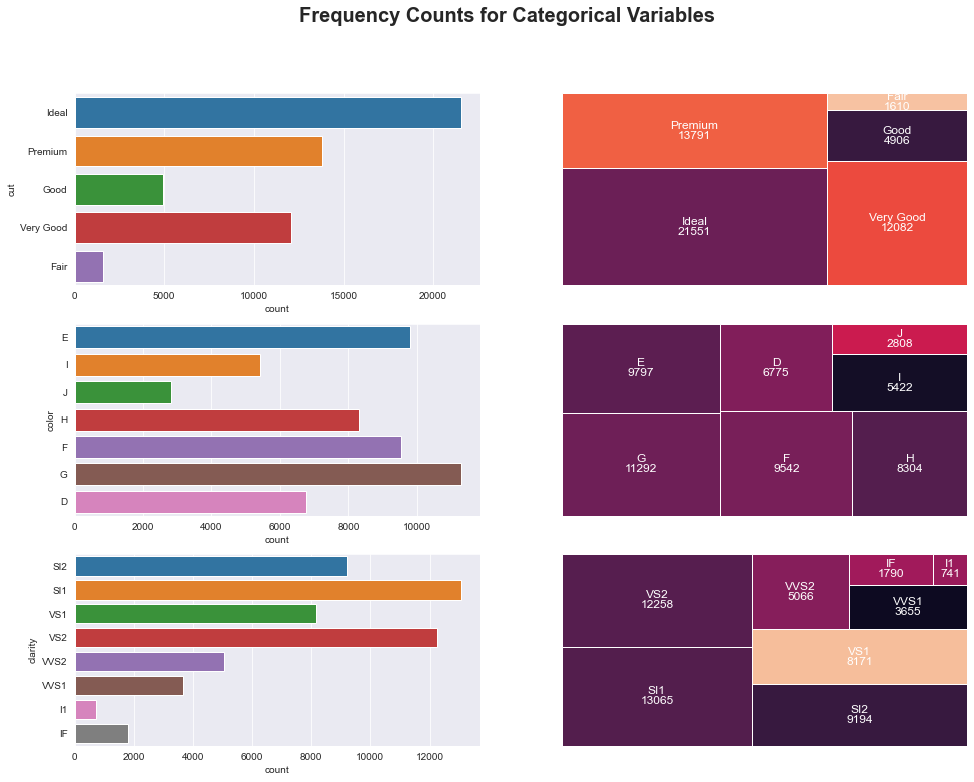

In [17]:
fig, axes = plt.subplots(3,2, figsize=(16,12))
axes = axes.flatten()

plt.suptitle("Frequency Counts for Categorical Variables", size=20, weight='bold')

x=0

for cols in cat_feat.columns:
    
    sns.countplot(data=df, y=cols, ax=axes[x])
    x += 1
    
    c = squarify.plot(sizes=cat_feat[cols].value_counts().values, label=cat_feat[cols].value_counts().index, 
                  value=cat_feat[cols].value_counts().values, ax=axes[x], text_kwargs={'color': 'white',
                                                                                      'fontsize':12})
    c.axis('off')
    x += 1

# Insights

1. For the column cut, "Ideal" is the most frequent values while "Fair" has a relatively low amount. 
2. For the column color, The values have slight even distribution with "G" having the highest frequency and "J" with the lowest.
3. For the column clarity, values "J1" and "IF" falls comparatively lower than the other values.  

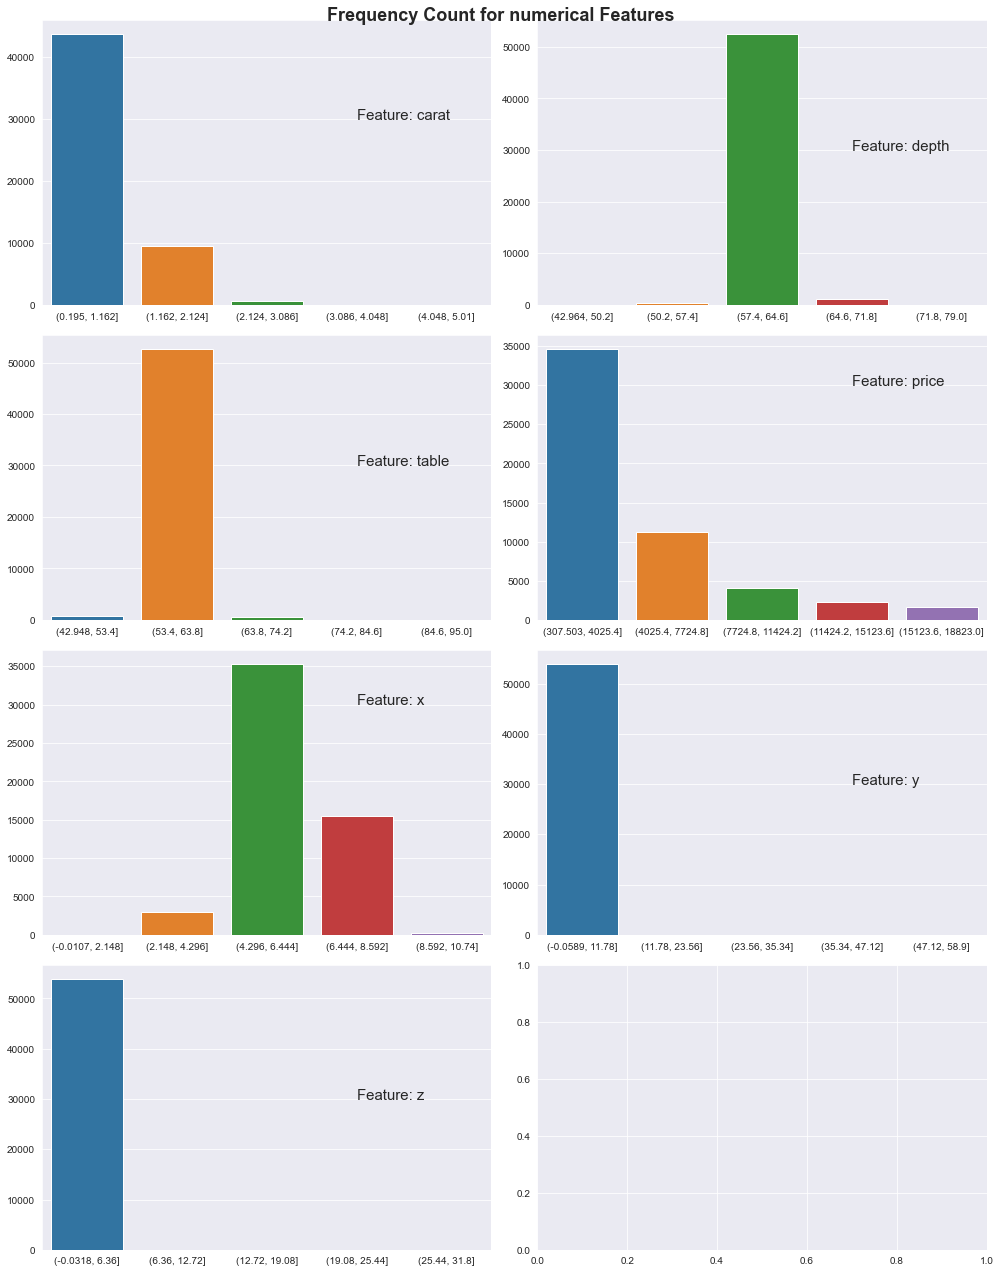

In [10]:
fig, axes = plt.subplots(4,2, figsize=(14,18))
axes = axes.flatten()

plt.suptitle("Frequency Count for numerical Features", size=18, weight='bold')

x=0

for cols in num_feat.columns:
    c= sns.barplot(x=pd.cut(df[cols], bins=5).value_counts().index, 
                y=pd.cut(df[cols], bins=5).value_counts().values,
               ax=axes[x])
    c.annotate(text = f'Feature: {cols}', xy=(3,30000), fontsize=15)
    x += 1


plt.tight_layout()

# Insights

Based on the plots that are made. Diamonds are most likely to have a 0.2 - 2.5 carats but there are few diamonds that weighs 3 - 5.1 carats. The Depth of each diamonds ranges from 58 - 68 while the table ranges from 53 - 65. Lastly the price ranges from 326 - 18,818. In Cut category, ideal has the most number of diamond while fair has the least amount of diamond. There are 7 kinds of color in the dataset but the highest amount of diamond is the color G while the least is color J. The highest amount of clarity is SI1 with a total amount of 13,065 diamonds and I1 has only 741 count that makes it the least in this category.

# Histograms

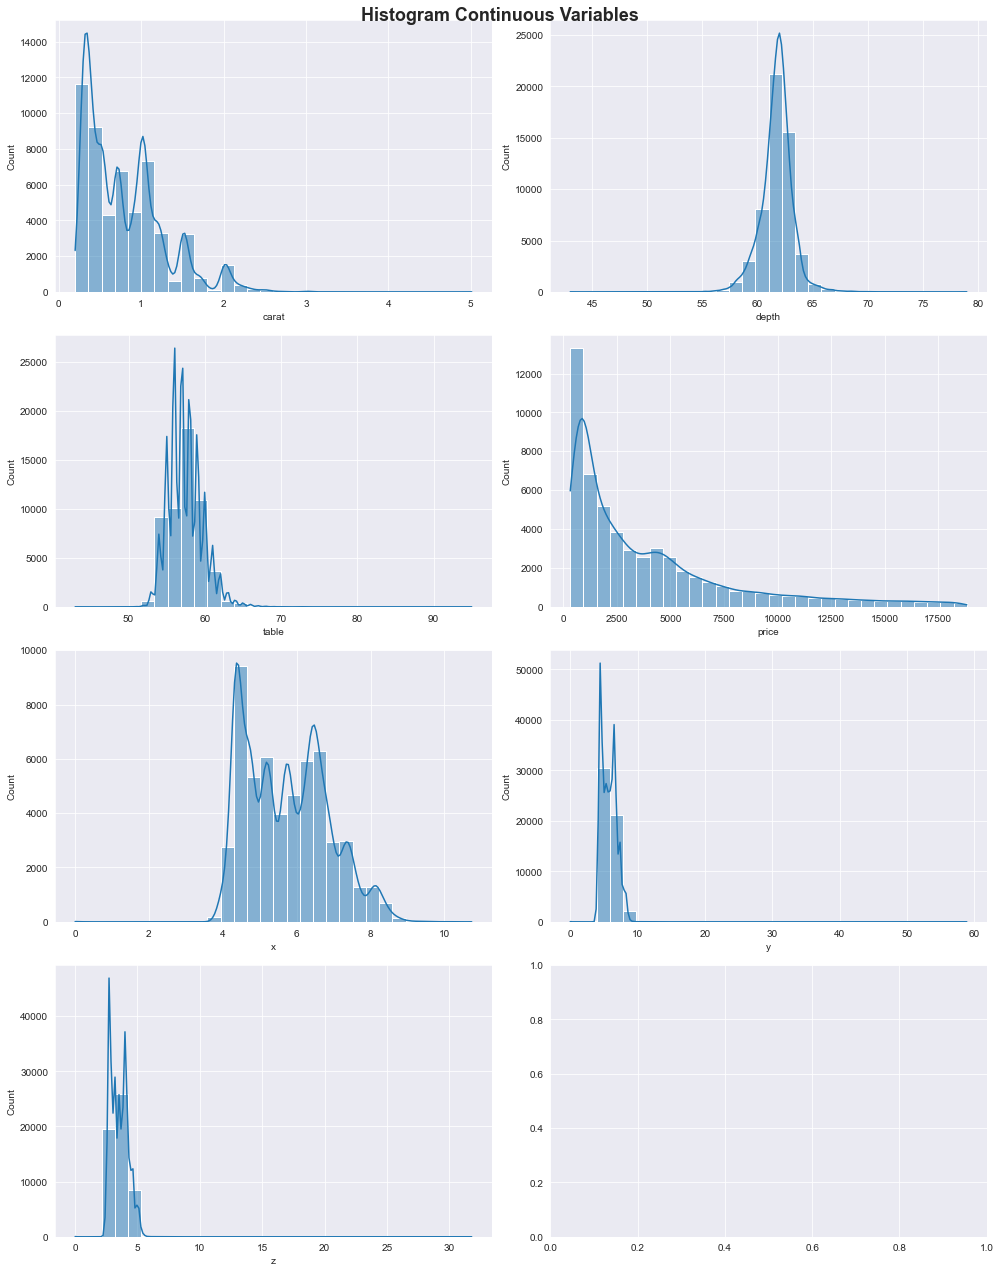

In [22]:
fig, axes = plt.subplots(4,2, figsize=(14,18))
axes = axes.flatten()

plt.suptitle("Histogram Continuous Variables", size=18, weight='bold')

x=0

for cols in num_feat.columns:
    
    sns.histplot(data=df, x=cols, ax=axes[x], bins=30, kde=True)
    x += 1

plt.tight_layout()

# Insights

1. For the column carat, the distribution is right skewed and is a multimodal. This indicates that there might be outliers which have a value of greater than 2.5
2. For the column depth, it is a normal distribution but there might be outliers. The distribution is stretched from left and right.
3. For the column table, the distribution is right skewed and it is also a multimodal.
4. For the column price, the distribution is right skewed
5. For the column x, the distribution resembles like a uniform distribution but is actually multimodal and there are outliers present.
6. For the column y, the distribution is right skewed and bimodal.
7. For the column z, the distribution is right skewed and bimodal.

# Scatterplots

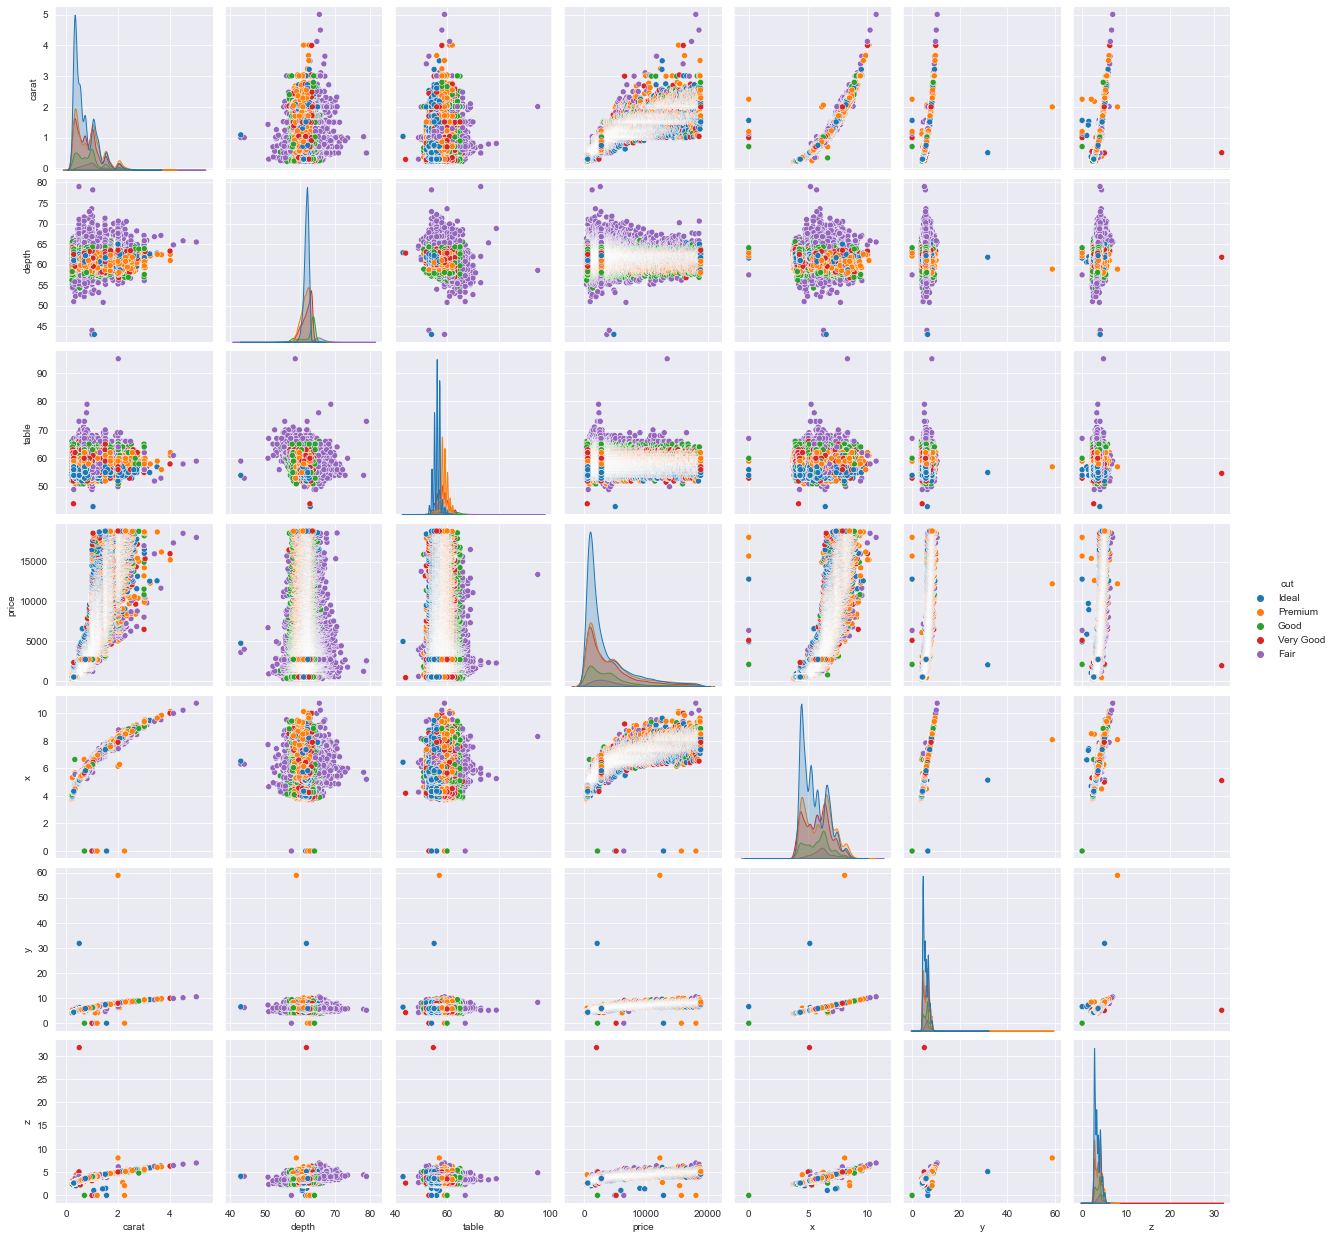

In [12]:
sns.pairplot(df, hue='cut')

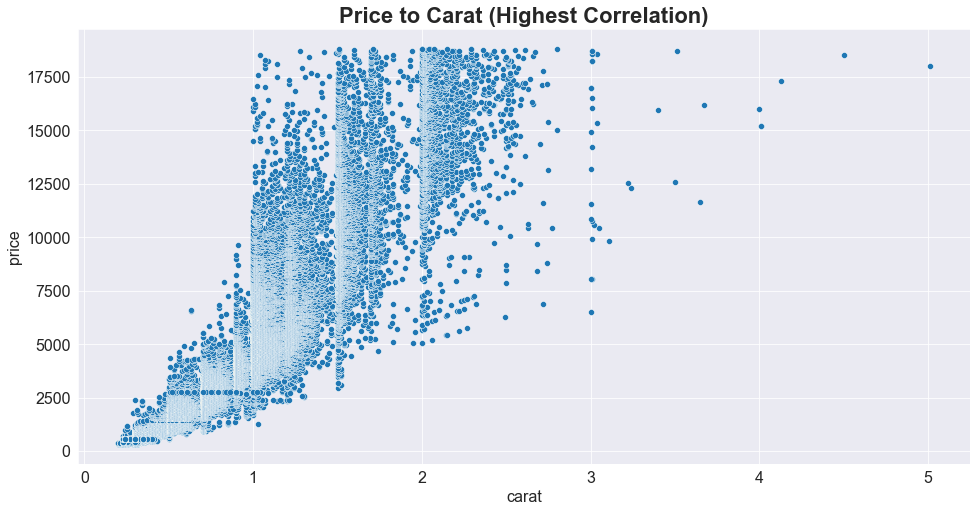

In [26]:
plt.figure(figsize=(16,8))
plt.title('Price to Carat (Highest Correlation)', fontsize=22, weight='bold')
sns.scatterplot(data=df, x='carat', y='price')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('carat', fontsize=16)
plt.ylabel('price', fontsize=16)
plt.show()

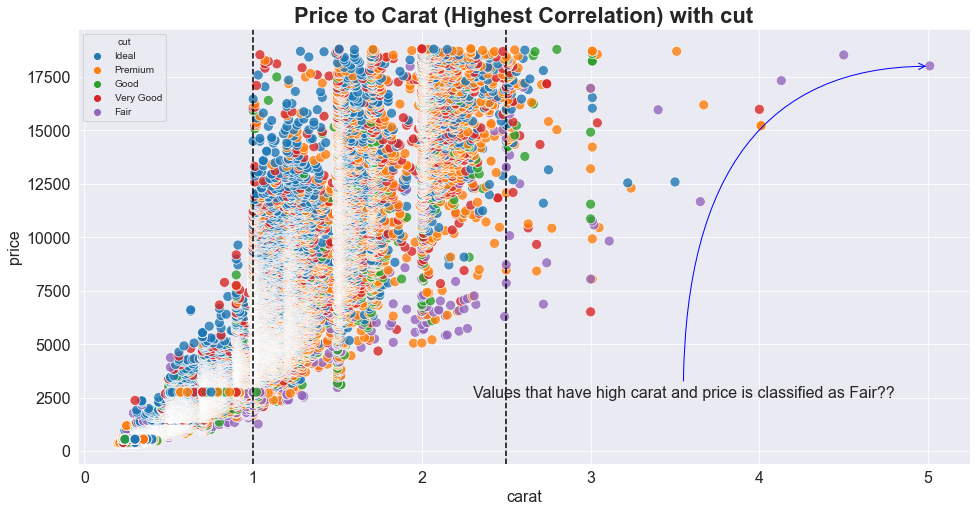

In [34]:
plt.figure(figsize=(16,8))
plt.title('Price to Carat (Highest Correlation) with cut', fontsize=22, weight='bold')

c = sns.scatterplot(data=df, x='carat', y='price', hue='cut', s=100, alpha=0.8)
c.annotate(text='Values that have high carat and price is classified as Fair??', xytext=(2.3, 2500), xy = (5, 18000), fontsize=16, 
          arrowprops=dict(arrowstyle='->', connectionstyle="angle3", color='blue'))

plt.axvline(x=1, ls='--', c='k')
plt.axvline(x=2.5, ls='--', c='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('carat', fontsize=16)
plt.ylabel('price', fontsize=16)
plt.show()

# Insights
In the Highest Correlation Scatter plot of Price to Carat with cut,
The diamonds with a fair cut fetch for a high price despite of it having the lowest
cut value because they have a carat of 17500 which is the highest in the carat range.

Based on this finding, we can conclude that no matter what the cut of a diamond is, it's price is expected to be higher when it has a high carat value.

# Correlations

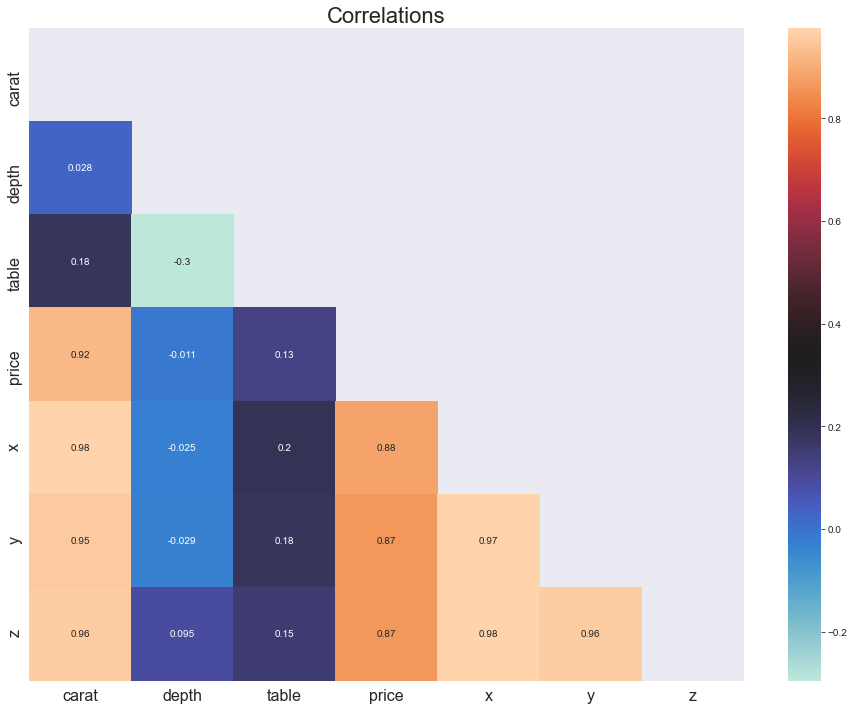

In [15]:
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(num_feat.corr()))
sns.heatmap(num_feat.corr(), mask =mask, annot=True, cmap='icefire')
plt.title('Correlations', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

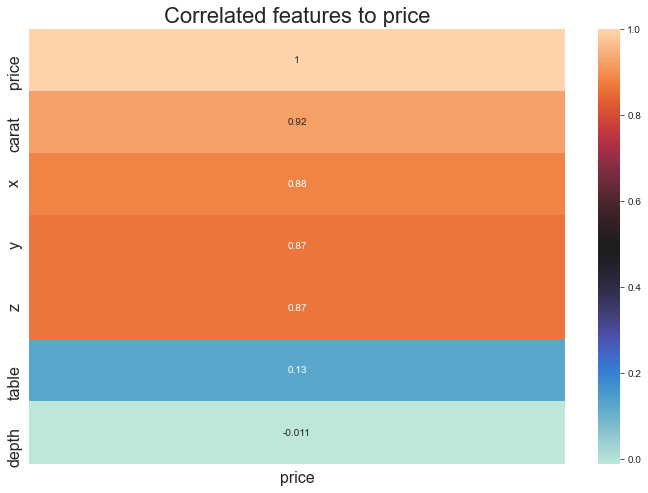

In [23]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(num_feat.corr()))
sns.heatmap(num_feat.corr()[['price']].sort_values('price', ascending=False), annot=True, cmap='icefire')
plt.title('Correlated features to price', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Insights
Based on the correlation table, the price of diamonds per carat increases in direct proportion to the weight category. In short, the bigger the carat weight of the diamond, the higher the total price per carat required to purchase the diamond. Visual features like table and depth are not correlated to the price of the diamond. These features are more likely used to identify the eye-cleanliness of a diamond.